In [69]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
import math

class GoalTask(gym.Env):
    """Custom 2D Field Environment"""

    def __init__(self, goal_change=False):
        super(GoalTask, self).__init__()
        
        # Action space: Agent can move in x and y directions within [-1, 1]
        self.action_space = spaces.Box(low=np.array([-1, -1]), high=np.array([1, 1]), dtype=np.float32)

        # Task state space:
        self.state_space = spaces.Box(low=np.array([0, 0]), high=np.array([20, 20]), dtype=np.float32)
        
        # Observation space: Agent's position in the 2D plane
        self.observation_space = spaces.Box(low=np.array([0, 0, 0, 0, 0]), high=np.array([1, 1, 1, 1, 1]), dtype=np.float32)
        
        # Initial positions (with Gaussian noise added)
        self.initial_positions = [(2, 2), (2, 18), (18, 2), (18, 18)]
        
        # Agent's current position
        self.position = np.array([0.0, 0.0])
        
        # Max steps for a episode
        self.max_steps = 200

        self.step_count = 0

        # Global steps counter
        self.global_step_count = 0

        # If the goal changes
        self.goal_change = goal_change

        # List to store agent positions for trajectory plotting
        self.positions = []

    def reset(self, seed=None, options=None):
        """Resets the environment to an initial state."""
        super().reset(seed=seed)
        # Randomly choose an initial position and add Gaussian noise N(0,1)
        initial_pos = np.array(self.initial_positions[np.random.randint(0, 4)])
        noise = np.random.normal(0, 1, size=2)  # Gaussian noise N(0,1)
        self.position = np.clip(initial_pos + noise, 0, 20)  # Ensure within bounds
        self.step_count = 0
        return self.position, {}

    def step(self, action):
        """Applies the agent's action and updates the environment."""

        self.step_count += 1
        self.global_step_count += 1

        # Clip the action values to ensure they're within the range [-1, 1]
        action = np.clip(action, self.action_space.low, self.action_space.high)

        # Update the agent's position based on the action
        # Define your custom position update equation here:
        # Example: position is updated by adding action (this can be more complex)
        self.position += action

        self.position = np.clip(self.position, self.state_space.low, self.state_space.high)
        self.positions.append(self.position.copy())

        out_of_bounds = np.any(self.position <= self.state_space.low) or np.any(self.position >= self.state_space.high)

        # rewards settings
        goal = np.array([10, 10])  # Example goal at center of the field
        distance_to_goal = np.linalg.norm(self.position - goal)

        if distance_to_goal < 2:
            reward = 1 
        elif out_of_bounds:
            reward = -0.01
        else:
            reward = 0

        # Done condition (optional, for episode termination)
        done = False
        if distance_to_goal < 2 or self.step_count >= self.max_steps:  # If agent is within 1 unit of the goal
            done = True

        # Info dictionary for debugging (optional)
        info = {}

        obs = [self.position[0]/20, 1-self.position[0]/20, self.position[1]/20, 1-self.position[1]/20, 1-distance_to_goal/(2*20*math.sqrt(2))]

        return obs, reward, done, False, info

    def render(self, mode='human'):
        """Renders the environment (optional)."""
        print(f'Agent position: {self.position}')

    def close(self):
        """Cleans up resources when the environment is closed."""
        pass

    def plot_trajectory(self):
        """Plots the agent's trajectory using matplotlib."""
        positions = np.array(self.positions)
        plt.figure(figsize=(6, 6))
        plt.plot(positions[:, 0], positions[:, 1], marker='o', markersize=5, label='Agent trajectory')
        plt.xlim(0, 20)
        plt.ylim(0, 20)
        plt.xlabel('X Position')
        plt.ylabel('Y Position')
        plt.title('Agent Trajectory in 2D Environment')
        plt.legend()
        plt.grid(True)
        plt.show()

In [47]:
my_env = GoalTask()
state = my_env.reset()
print(state)

(array([1.51297279, 2.26698564]), {})


In [61]:
np.any(np.array([1, 0]) == np.array([0, 0])) or np.any(np.array([1, 1]) == np.array([2, 2]))

np.True_

In [72]:
action = np.array([0, 0])
my_env.step(action)


([np.float64(0.025648639698950627),
  np.float64(0.9743513603010494),
  np.float64(0.06334928189471971),
  np.float64(0.9366507181052803),
  np.float64(0.7720545397904048)],
 0,
 False,
 False,
 {})

Agent position: [1.75424798 1.3331006 ]
Agent position: [1.24908789 0.5454977 ]
Agent position: [1.55266623 0.        ]
Agent position: [0.95313333 0.32766426]
Agent position: [1.23422571 0.84873265]
Agent position: [0.54322256 1.04653105]
Agent position: [1.49504949 1.58056864]
Agent position: [1.89203914 0.71577278]
Agent position: [1.88530037 0.9843187 ]
Agent position: [2.64971891 0.38864294]
Agent position: [3.54743853 0.        ]
Agent position: [4.440209   0.75022966]
Agent position: [4.78991783 1.60147625]
Agent position: [4.59095067 2.06282774]
Agent position: [5.13772488 1.61000049]
Agent position: [4.85740453 1.73471022]
Agent position: [4.24042588 1.2012905 ]
Agent position: [4.24626235 0.22830654]
Agent position: [3.55415139 0.20437349]
Agent position: [2.78338245 1.06083227]
Agent position: [2.73324374 0.49291177]
Agent position: [2.28598774 0.98266376]
Agent position: [2.69441114 1.32072462]
Agent position: [2.72948704 0.77031178]
Agent position: [3.4887322  1.30118061]


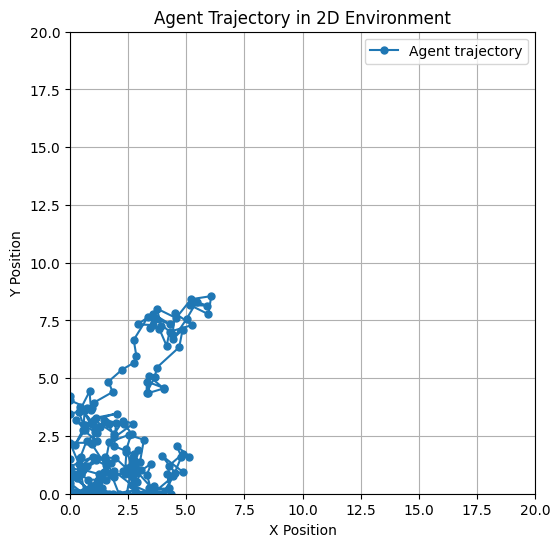

-0.4000000000000002


In [70]:
env = GoalTask()
state = env.reset()
total_reward = 0

for step in range(300):  # Try running for 300 steps to see episode terminate after 200
    action = env.action_space.sample()  # Take a random action
    next_state, reward, done, truncted, info = env.step(action)
    total_reward += reward
    env.render()  # Print the agent's position
   
    if done:
        print(f"Episode finished after {step + 1} steps.")
        break

env.plot_trajectory()  # Plot the trajectory of the agent

env.close()

print(total_reward)